In [1]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# -----------------------------
# 1. Data Preprocessing (Single Action Class)
# -----------------------------
base_dir = "/kaggle/input/ju-cricket/Cricket_Dataset_final/Task_B"  # base Task_B folder

action_class = "Bowling"  # Change to "Bowling" / "Fielding" / "Umpire"

transform = transforms.Compose([
    transforms.Resize((224, 224)),   
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], 
                         [0.229, 0.224, 0.225])
])

# Point ImageFolder to *only* the action class folder
train_ds = datasets.ImageFolder(f"{base_dir}/train/{action_class}", transform=transform)
val_ds   = datasets.ImageFolder(f"{base_dir}/val/{action_class}", transform=transform)
test_ds  = datasets.ImageFolder(f"{base_dir}/test/{action_class}", transform=transform)

train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
val_loader   = DataLoader(val_ds, batch_size=32, shuffle=False)
test_loader  = DataLoader(test_ds, batch_size=32, shuffle=False)

print(f"Training only on: {action_class}")
print("Train classes:", train_ds.classes)
print("Train samples:", len(train_ds), 
      "Val samples:", len(val_ds), 
      "Test samples:", len(test_ds))


Training only on: Bowling
Train classes: ['fast_bowl', 'spin_bowl']
Train samples: 1710 Val samples: 432 Test samples: 549


In [2]:
print("Total training images:", len(train_ds))
print("Total validation images:", len(val_ds))
print("Total test images:", len(test_ds))

total_images = len(train_ds) + len(val_ds) + len(test_ds)
print("Total images in dataset:", total_images)

Total training images: 1710
Total validation images: 432
Total test images: 549
Total images in dataset: 2691


In [3]:
ignore_folder = "random_occlusion"

def count_images_ignore_folder(dataset, ignore_folder):
    count = 0
    for img_path, label in dataset.samples:
        # Skip if the image path contains the ignore_folder
        if ignore_folder not in img_path.split("/"):
            count += 1
    return count

train_count = count_images_ignore_folder(train_ds, ignore_folder)
val_count   = count_images_ignore_folder(val_ds, ignore_folder)
test_count  = count_images_ignore_folder(test_ds, ignore_folder)

total_count = train_count + val_count + test_count

print("Training images (excluding '{}'): {}".format(ignore_folder, train_count))
print("Validation images (excluding '{}'): {}".format(ignore_folder, val_count))
print("Test images (excluding '{}'): {}".format(ignore_folder, test_count))
print("Total images (excluding '{}'): {}".format(ignore_folder, total_count))

Training images (excluding 'random_occlusion'): 1520
Validation images (excluding 'random_occlusion'): 384
Test images (excluding 'random_occlusion'): 488
Total images (excluding 'random_occlusion'): 2392


In [4]:
ignore_folder = "random_occlusionw"

def get_included_folders(dataset, ignore_folder):
    included = set()
    for img_path, label in dataset.samples:
        # Split the path into parts and ignore if ignore_folder is in the path
        if ignore_folder not in img_path.split("/"):
            # The folder name just above the image (or the class folder)
            folder_name = img_path.split("/")[-2]
            included.add(folder_name)
    return included

train_folders = get_included_folders(train_ds, ignore_folder)
val_folders   = get_included_folders(val_ds, ignore_folder)
test_folders  = get_included_folders(test_ds, ignore_folder)

print("Training folders considered:", train_folders)
print("Validation folders considered:", val_folders)
print("Test folders considered:", test_folders)

Training folders considered: {'random_occlusion', 'blur', 'lens_flare', 'dirty_lens', 'gaussian_noise', 'original', 'low_resolution', 'chromatic_aberration', 'motion_blur'}
Validation folders considered: {'random_occlusion', 'blur', 'lens_flare', 'dirty_lens', 'gaussian_noise', 'original', 'low_resolution', 'chromatic_aberration', 'motion_blur'}
Test folders considered: {'random_occlusion', 'blur', 'lens_flare', 'dirty_lens', 'gaussian_noise', 'original', 'low_resolution', 'chromatic_aberration', 'motion_blur'}


In [5]:
ignore_folder = "random_occlusion"

def filter_samples(dataset, ignore_folder):
    # Keep only samples where ignore_folder is NOT in the path
    filtered_samples = [s for s in dataset.samples if ignore_folder not in s[0].split("/")]
    dataset.samples = filtered_samples
    dataset.targets = [s[1] for s in filtered_samples]  # Update targets accordingly
    return dataset

# Create original datasets
train_ds = datasets.ImageFolder(f"{base_dir}/train/Bowling", transform=transform)
val_ds   = datasets.ImageFolder(f"{base_dir}/val/Bowling", transform=transform)
test_ds  = datasets.ImageFolder(f"{base_dir}/test/Bowling", transform=transform)

# Filter out 'random_occlusion' folder
train_ds = filter_samples(train_ds, ignore_folder)
val_ds   = filter_samples(val_ds, ignore_folder)
test_ds  = filter_samples(test_ds, ignore_folder)

# DataLoaders
train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
val_loader   = DataLoader(val_ds, batch_size=32, shuffle=False)
test_loader  = DataLoader(test_ds, batch_size=32, shuffle=False)

# Classes (will remain the same)
classes = train_ds.classes
print("Classes:", classes)

# Show counts
print("Final Training images:", len(train_ds))
print("Final Validation images:", len(val_ds))
print("Final Test images:", len(test_ds))
print("Total images after filtering:", len(train_ds) + len(val_ds) + len(test_ds))

Classes: ['fast_bowl', 'spin_bowl']
Final Training images: 1520
Final Validation images: 384
Final Test images: 488
Total images after filtering: 2392


In [6]:
ignore_folder = "random_occlusion"

def get_included_folders(dataset, ignore_folder):
    included = set()
    for img_path, label in dataset.samples:
        # Split the path into parts and ignore if ignore_folder is in the path
        if ignore_folder not in img_path.split("/"):
            # The folder name just above the image (or the class folder)
            folder_name = img_path.split("/")[-2]
            included.add(folder_name)
    return included

train_folders = get_included_folders(train_ds, ignore_folder)
val_folders   = get_included_folders(val_ds, ignore_folder)
test_folders  = get_included_folders(test_ds, ignore_folder)

print("Training folders considered:", train_folders)
print("Validation folders considered:", val_folders)
print("Test folders considered:", test_folders)

Training folders considered: {'blur', 'lens_flare', 'dirty_lens', 'gaussian_noise', 'original', 'low_resolution', 'chromatic_aberration', 'motion_blur'}
Validation folders considered: {'blur', 'lens_flare', 'dirty_lens', 'gaussian_noise', 'original', 'low_resolution', 'chromatic_aberration', 'motion_blur'}
Test folders considered: {'blur', 'lens_flare', 'dirty_lens', 'gaussian_noise', 'original', 'low_resolution', 'chromatic_aberration', 'motion_blur'}


In [7]:
import seaborn as sns
import numpy as np
import time
from tqdm import tqdm
import torch
import torch.nn as nn
import torchvision.models as models

In [8]:
# -----------------------------
# 2. Pretrained ResNet50 Model
# -----------------------------
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Load pretrained ResNet50
print("üîÑ Loading pretrained ResNet50 from ImageNet...")
model = models.resnet50(pretrained=True)

# Replace final classification layer
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, len(classes))
model = model.to(device)

print(f"‚úÖ Model loaded with {len(classes)} output classes")
print(f"üìä Total parameters: {sum(p.numel() for p in model.parameters()):,}")
print(f"üìä Trainable parameters: {sum(p.numel() for p in model.parameters() if p.requires_grad):,}")

# Model summary
try:
    summary(model, (3, 224, 224))
except:
    print("Model summary not available")

Using device: cuda
üîÑ Loading pretrained ResNet50 from ImageNet...


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 97.8M/97.8M [00:00<00:00, 193MB/s]


‚úÖ Model loaded with 2 output classes
üìä Total parameters: 23,512,130
üìä Trainable parameters: 23,512,130
Model summary not available



üìã Training Configuration:
‚îÇ Optimizer: Adam (lr=0.0001)
‚îÇ Loss Function: CrossEntropyLoss
‚îÇ Batch Size: 32
‚îÇ Device: cuda

üöÄ Starting Fine-tuning for 50 epochs...

üìà Epoch 1/50
--------------------------------------------------
üîÑ Training Phase...


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 48/48 [00:33<00:00,  1.45it/s, Loss=0.3152, Acc=0.8546]


‚úÖ Training completed in 33.14s
üîç Validation Phase...


Validation: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:04<00:00,  2.57it/s, Loss=0.8702, Acc=0.7135]


‚úÖ Validation completed in 4.67s
üåü New best model found! Validation Loss: 0.8702

üìä Epoch 1 Summary:
‚îÇ Train Loss: 0.3152 | Train Acc: 0.8546
‚îÇ Val Loss:   0.8702 | Val Acc:   0.7135
‚îÇ Train Time: 33.14s | Val Time: 4.67s
‚îÇ Total Epoch Time: 37.82s
‚îÇ Best Val Loss: 0.8702 (Epoch 1)
‚îÇ GPU Memory: 0.4GB / 3.2GB

üìà Epoch 2/50
--------------------------------------------------
üîÑ Training Phase...


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 48/48 [00:25<00:00,  1.88it/s, Loss=0.0341, Acc=0.9934]


‚úÖ Training completed in 25.50s
üîç Validation Phase...


Validation: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:03<00:00,  3.77it/s, Loss=0.8843, Acc=0.6953]


‚úÖ Validation completed in 3.19s

üìä Epoch 2 Summary:
‚îÇ Train Loss: 0.0341 | Train Acc: 0.9934
‚îÇ Val Loss:   0.8843 | Val Acc:   0.6953
‚îÇ Train Time: 25.50s | Val Time: 3.19s
‚îÇ Total Epoch Time: 28.69s
‚îÇ Best Val Loss: 0.8702 (Epoch 1)
‚îÇ GPU Memory: 0.4GB / 3.2GB

üìà Epoch 3/50
--------------------------------------------------
üîÑ Training Phase...


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 48/48 [00:25<00:00,  1.88it/s, Loss=0.0096, Acc=0.9980]


‚úÖ Training completed in 25.47s
üîç Validation Phase...


Validation: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:03<00:00,  3.75it/s, Loss=0.9669, Acc=0.7266]


‚úÖ Validation completed in 3.21s

üìä Epoch 3 Summary:
‚îÇ Train Loss: 0.0096 | Train Acc: 0.9980
‚îÇ Val Loss:   0.9669 | Val Acc:   0.7266
‚îÇ Train Time: 25.47s | Val Time: 3.21s
‚îÇ Total Epoch Time: 28.68s
‚îÇ Best Val Loss: 0.8702 (Epoch 1)
‚îÇ GPU Memory: 0.4GB / 3.2GB

üìà Epoch 4/50
--------------------------------------------------
üîÑ Training Phase...


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 48/48 [00:25<00:00,  1.87it/s, Loss=0.0147, Acc=0.9961]


‚úÖ Training completed in 25.71s
üîç Validation Phase...


Validation: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:03<00:00,  3.71it/s, Loss=1.1301, Acc=0.7344]


‚úÖ Validation completed in 3.24s

üìä Epoch 4 Summary:
‚îÇ Train Loss: 0.0147 | Train Acc: 0.9961
‚îÇ Val Loss:   1.1301 | Val Acc:   0.7344
‚îÇ Train Time: 25.71s | Val Time: 3.24s
‚îÇ Total Epoch Time: 28.95s
‚îÇ Best Val Loss: 0.8702 (Epoch 1)
‚îÇ GPU Memory: 0.4GB / 3.2GB

üìà Epoch 5/50
--------------------------------------------------
üîÑ Training Phase...


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 48/48 [00:25<00:00,  1.86it/s, Loss=0.0119, Acc=0.9967]


‚úÖ Training completed in 25.83s
üîç Validation Phase...


Validation: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:03<00:00,  3.74it/s, Loss=1.4146, Acc=0.6719]


‚úÖ Validation completed in 3.21s

üìä Epoch 5 Summary:
‚îÇ Train Loss: 0.0119 | Train Acc: 0.9967
‚îÇ Val Loss:   1.4146 | Val Acc:   0.6719
‚îÇ Train Time: 25.83s | Val Time: 3.21s
‚îÇ Total Epoch Time: 29.05s
‚îÇ Best Val Loss: 0.8702 (Epoch 1)
‚îÇ GPU Memory: 0.4GB / 3.2GB

üìà Epoch 6/50
--------------------------------------------------
üîÑ Training Phase...


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 48/48 [00:26<00:00,  1.84it/s, Loss=0.0178, Acc=0.9928]


‚úÖ Training completed in 26.05s
üîç Validation Phase...


Validation: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:03<00:00,  3.76it/s, Loss=1.3582, Acc=0.7005]


‚úÖ Validation completed in 3.20s

üìä Epoch 6 Summary:
‚îÇ Train Loss: 0.0178 | Train Acc: 0.9928
‚îÇ Val Loss:   1.3582 | Val Acc:   0.7005
‚îÇ Train Time: 26.05s | Val Time: 3.20s
‚îÇ Total Epoch Time: 29.25s
‚îÇ Best Val Loss: 0.8702 (Epoch 1)
‚îÇ GPU Memory: 0.4GB / 3.2GB

üìà Epoch 7/50
--------------------------------------------------
üîÑ Training Phase...


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 48/48 [00:26<00:00,  1.83it/s, Loss=0.0494, Acc=0.9809]


‚úÖ Training completed in 26.27s
üîç Validation Phase...


Validation: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:03<00:00,  3.54it/s, Loss=1.1477, Acc=0.6589]


‚úÖ Validation completed in 3.40s

üìä Epoch 7 Summary:
‚îÇ Train Loss: 0.0494 | Train Acc: 0.9809
‚îÇ Val Loss:   1.1477 | Val Acc:   0.6589
‚îÇ Train Time: 26.27s | Val Time: 3.40s
‚îÇ Total Epoch Time: 29.67s
‚îÇ Best Val Loss: 0.8702 (Epoch 1)
‚îÇ GPU Memory: 0.4GB / 3.2GB

üìà Epoch 8/50
--------------------------------------------------
üîÑ Training Phase...


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 48/48 [00:26<00:00,  1.81it/s, Loss=0.0163, Acc=0.9934]


‚úÖ Training completed in 26.55s
üîç Validation Phase...


Validation: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:03<00:00,  3.67it/s, Loss=1.2453, Acc=0.6979]


‚úÖ Validation completed in 3.28s

üìä Epoch 8 Summary:
‚îÇ Train Loss: 0.0163 | Train Acc: 0.9934
‚îÇ Val Loss:   1.2453 | Val Acc:   0.6979
‚îÇ Train Time: 26.55s | Val Time: 3.28s
‚îÇ Total Epoch Time: 29.83s
‚îÇ Best Val Loss: 0.8702 (Epoch 1)
‚îÇ GPU Memory: 0.4GB / 3.2GB

üìà Epoch 9/50
--------------------------------------------------
üîÑ Training Phase...


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 48/48 [00:26<00:00,  1.80it/s, Loss=0.0163, Acc=0.9954]


‚úÖ Training completed in 26.60s
üîç Validation Phase...


Validation: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:03<00:00,  3.57it/s, Loss=1.2727, Acc=0.6875]


‚úÖ Validation completed in 3.36s

üìä Epoch 9 Summary:
‚îÇ Train Loss: 0.0163 | Train Acc: 0.9954
‚îÇ Val Loss:   1.2727 | Val Acc:   0.6875
‚îÇ Train Time: 26.60s | Val Time: 3.36s
‚îÇ Total Epoch Time: 29.96s
‚îÇ Best Val Loss: 0.8702 (Epoch 1)
‚îÇ GPU Memory: 0.4GB / 3.2GB

üìà Epoch 10/50
--------------------------------------------------
üîÑ Training Phase...


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 48/48 [00:26<00:00,  1.81it/s, Loss=0.0190, Acc=0.9954]


‚úÖ Training completed in 26.59s
üîç Validation Phase...


Validation: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:03<00:00,  3.72it/s, Loss=1.2815, Acc=0.7057]


‚úÖ Validation completed in 3.23s

üìä Epoch 10 Summary:
‚îÇ Train Loss: 0.0190 | Train Acc: 0.9954
‚îÇ Val Loss:   1.2815 | Val Acc:   0.7057
‚îÇ Train Time: 26.59s | Val Time: 3.23s
‚îÇ Total Epoch Time: 29.82s
‚îÇ Best Val Loss: 0.8702 (Epoch 1)
‚îÇ GPU Memory: 0.4GB / 3.2GB

üìà Epoch 11/50
--------------------------------------------------
üîÑ Training Phase...


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 48/48 [00:26<00:00,  1.81it/s, Loss=0.0077, Acc=0.9980]


‚úÖ Training completed in 26.50s
üîç Validation Phase...


Validation: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:03<00:00,  3.66it/s, Loss=0.9178, Acc=0.7500]


‚úÖ Validation completed in 3.28s

üìä Epoch 11 Summary:
‚îÇ Train Loss: 0.0077 | Train Acc: 0.9980
‚îÇ Val Loss:   0.9178 | Val Acc:   0.7500
‚îÇ Train Time: 26.50s | Val Time: 3.28s
‚îÇ Total Epoch Time: 29.78s
‚îÇ Best Val Loss: 0.8702 (Epoch 1)
‚îÇ GPU Memory: 0.4GB / 3.2GB

üìà Epoch 12/50
--------------------------------------------------
üîÑ Training Phase...


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 48/48 [00:26<00:00,  1.81it/s, Loss=0.0013, Acc=1.0000]


‚úÖ Training completed in 26.60s
üîç Validation Phase...


Validation: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:03<00:00,  3.64it/s, Loss=1.1352, Acc=0.7474]


‚úÖ Validation completed in 3.30s

üìä Epoch 12 Summary:
‚îÇ Train Loss: 0.0013 | Train Acc: 1.0000
‚îÇ Val Loss:   1.1352 | Val Acc:   0.7474
‚îÇ Train Time: 26.60s | Val Time: 3.30s
‚îÇ Total Epoch Time: 29.90s
‚îÇ Best Val Loss: 0.8702 (Epoch 1)
‚îÇ GPU Memory: 0.4GB / 3.2GB

üìà Epoch 13/50
--------------------------------------------------
üîÑ Training Phase...


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 48/48 [00:26<00:00,  1.82it/s, Loss=0.0009, Acc=1.0000]


‚úÖ Training completed in 26.43s
üîç Validation Phase...


Validation: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:03<00:00,  3.65it/s, Loss=1.0610, Acc=0.7526]


‚úÖ Validation completed in 3.29s

üìä Epoch 13 Summary:
‚îÇ Train Loss: 0.0009 | Train Acc: 1.0000
‚îÇ Val Loss:   1.0610 | Val Acc:   0.7526
‚îÇ Train Time: 26.43s | Val Time: 3.29s
‚îÇ Total Epoch Time: 29.72s
‚îÇ Best Val Loss: 0.8702 (Epoch 1)
‚îÇ GPU Memory: 0.4GB / 3.2GB

üìà Epoch 14/50
--------------------------------------------------
üîÑ Training Phase...


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 48/48 [00:26<00:00,  1.80it/s, Loss=0.0002, Acc=1.0000]


‚úÖ Training completed in 26.59s
üîç Validation Phase...


Validation: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:03<00:00,  3.64it/s, Loss=1.0598, Acc=0.7552]


‚úÖ Validation completed in 3.30s

üìä Epoch 14 Summary:
‚îÇ Train Loss: 0.0002 | Train Acc: 1.0000
‚îÇ Val Loss:   1.0598 | Val Acc:   0.7552
‚îÇ Train Time: 26.59s | Val Time: 3.30s
‚îÇ Total Epoch Time: 29.90s
‚îÇ Best Val Loss: 0.8702 (Epoch 1)
‚îÇ GPU Memory: 0.4GB / 3.2GB

üìà Epoch 15/50
--------------------------------------------------
üîÑ Training Phase...


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 48/48 [00:26<00:00,  1.80it/s, Loss=0.0002, Acc=1.0000]


‚úÖ Training completed in 26.65s
üîç Validation Phase...


Validation: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:03<00:00,  3.55it/s, Loss=1.1712, Acc=0.7422]


‚úÖ Validation completed in 3.38s

üìä Epoch 15 Summary:
‚îÇ Train Loss: 0.0002 | Train Acc: 1.0000
‚îÇ Val Loss:   1.1712 | Val Acc:   0.7422
‚îÇ Train Time: 26.65s | Val Time: 3.38s
‚îÇ Total Epoch Time: 30.04s
‚îÇ Best Val Loss: 0.8702 (Epoch 1)
‚îÇ GPU Memory: 0.4GB / 3.2GB

üìà Epoch 16/50
--------------------------------------------------
üîÑ Training Phase...


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 48/48 [00:26<00:00,  1.80it/s, Loss=0.0004, Acc=1.0000]


‚úÖ Training completed in 26.60s
üîç Validation Phase...


Validation: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:03<00:00,  3.62it/s, Loss=1.1035, Acc=0.7552]


‚úÖ Validation completed in 3.32s

üìä Epoch 16 Summary:
‚îÇ Train Loss: 0.0004 | Train Acc: 1.0000
‚îÇ Val Loss:   1.1035 | Val Acc:   0.7552
‚îÇ Train Time: 26.60s | Val Time: 3.32s
‚îÇ Total Epoch Time: 29.92s
‚îÇ Best Val Loss: 0.8702 (Epoch 1)
‚îÇ GPU Memory: 0.4GB / 3.2GB

üìà Epoch 17/50
--------------------------------------------------
üîÑ Training Phase...


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 48/48 [00:26<00:00,  1.80it/s, Loss=0.0006, Acc=1.0000]


‚úÖ Training completed in 26.74s
üîç Validation Phase...


Validation: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:03<00:00,  3.62it/s, Loss=1.2227, Acc=0.7708]


‚úÖ Validation completed in 3.32s

üìä Epoch 17 Summary:
‚îÇ Train Loss: 0.0006 | Train Acc: 1.0000
‚îÇ Val Loss:   1.2227 | Val Acc:   0.7708
‚îÇ Train Time: 26.74s | Val Time: 3.32s
‚îÇ Total Epoch Time: 30.06s
‚îÇ Best Val Loss: 0.8702 (Epoch 1)
‚îÇ GPU Memory: 0.4GB / 3.2GB

üìà Epoch 18/50
--------------------------------------------------
üîÑ Training Phase...


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 48/48 [00:26<00:00,  1.80it/s, Loss=0.0037, Acc=0.9993]


‚úÖ Training completed in 26.70s
üîç Validation Phase...


Validation: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:03<00:00,  3.74it/s, Loss=1.3005, Acc=0.7500]


‚úÖ Validation completed in 3.21s

üìä Epoch 18 Summary:
‚îÇ Train Loss: 0.0037 | Train Acc: 0.9993
‚îÇ Val Loss:   1.3005 | Val Acc:   0.7500
‚îÇ Train Time: 26.70s | Val Time: 3.21s
‚îÇ Total Epoch Time: 29.92s
‚îÇ Best Val Loss: 0.8702 (Epoch 1)
‚îÇ GPU Memory: 0.4GB / 3.2GB

üìà Epoch 19/50
--------------------------------------------------
üîÑ Training Phase...


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 48/48 [00:25<00:00,  1.85it/s, Loss=0.0427, Acc=0.9875]


‚úÖ Training completed in 25.89s
üîç Validation Phase...


Validation: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:03<00:00,  3.63it/s, Loss=1.1201, Acc=0.7240]


‚úÖ Validation completed in 3.31s

üìä Epoch 19 Summary:
‚îÇ Train Loss: 0.0427 | Train Acc: 0.9875
‚îÇ Val Loss:   1.1201 | Val Acc:   0.7240
‚îÇ Train Time: 25.89s | Val Time: 3.31s
‚îÇ Total Epoch Time: 29.20s
‚îÇ Best Val Loss: 0.8702 (Epoch 1)
‚îÇ GPU Memory: 0.4GB / 3.2GB

üìà Epoch 20/50
--------------------------------------------------
üîÑ Training Phase...


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 48/48 [00:26<00:00,  1.81it/s, Loss=0.0123, Acc=0.9961]


‚úÖ Training completed in 26.57s
üîç Validation Phase...


Validation: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:03<00:00,  3.64it/s, Loss=1.3183, Acc=0.6979]


‚úÖ Validation completed in 3.30s

üìä Epoch 20 Summary:
‚îÇ Train Loss: 0.0123 | Train Acc: 0.9961
‚îÇ Val Loss:   1.3183 | Val Acc:   0.6979
‚îÇ Train Time: 26.57s | Val Time: 3.30s
‚îÇ Total Epoch Time: 29.87s
‚îÇ Best Val Loss: 0.8702 (Epoch 1)
‚îÇ GPU Memory: 0.4GB / 3.2GB

üìà Epoch 21/50
--------------------------------------------------
üîÑ Training Phase...


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 48/48 [00:26<00:00,  1.81it/s, Loss=0.0101, Acc=0.9987]


‚úÖ Training completed in 26.50s
üîç Validation Phase...


Validation: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:03<00:00,  3.61it/s, Loss=2.0584, Acc=0.6693]


‚úÖ Validation completed in 3.33s

üìä Epoch 21 Summary:
‚îÇ Train Loss: 0.0101 | Train Acc: 0.9987
‚îÇ Val Loss:   2.0584 | Val Acc:   0.6693
‚îÇ Train Time: 26.50s | Val Time: 3.33s
‚îÇ Total Epoch Time: 29.84s
‚îÇ Best Val Loss: 0.8702 (Epoch 1)
‚îÇ GPU Memory: 0.4GB / 3.2GB

üìà Epoch 22/50
--------------------------------------------------
üîÑ Training Phase...


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 48/48 [00:26<00:00,  1.79it/s, Loss=0.0092, Acc=0.9974]


‚úÖ Training completed in 26.75s
üîç Validation Phase...


Validation: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:03<00:00,  3.74it/s, Loss=1.4958, Acc=0.6667]


‚úÖ Validation completed in 3.21s

üìä Epoch 22 Summary:
‚îÇ Train Loss: 0.0092 | Train Acc: 0.9974
‚îÇ Val Loss:   1.4958 | Val Acc:   0.6667
‚îÇ Train Time: 26.75s | Val Time: 3.21s
‚îÇ Total Epoch Time: 29.96s
‚îÇ Best Val Loss: 0.8702 (Epoch 1)
‚îÇ GPU Memory: 0.4GB / 3.2GB

üìà Epoch 23/50
--------------------------------------------------
üîÑ Training Phase...


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 48/48 [00:26<00:00,  1.81it/s, Loss=0.0158, Acc=0.9961]


‚úÖ Training completed in 26.59s
üîç Validation Phase...


Validation: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:03<00:00,  3.71it/s, Loss=1.3246, Acc=0.6849]


‚úÖ Validation completed in 3.24s

üìä Epoch 23 Summary:
‚îÇ Train Loss: 0.0158 | Train Acc: 0.9961
‚îÇ Val Loss:   1.3246 | Val Acc:   0.6849
‚îÇ Train Time: 26.59s | Val Time: 3.24s
‚îÇ Total Epoch Time: 29.83s
‚îÇ Best Val Loss: 0.8702 (Epoch 1)
‚îÇ GPU Memory: 0.4GB / 3.2GB

üìà Epoch 24/50
--------------------------------------------------
üîÑ Training Phase...


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 48/48 [00:26<00:00,  1.81it/s, Loss=0.0187, Acc=0.9954]


‚úÖ Training completed in 26.53s
üîç Validation Phase...


Validation: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:03<00:00,  3.63it/s, Loss=1.3209, Acc=0.7161]


‚úÖ Validation completed in 3.31s

üìä Epoch 24 Summary:
‚îÇ Train Loss: 0.0187 | Train Acc: 0.9954
‚îÇ Val Loss:   1.3209 | Val Acc:   0.7161
‚îÇ Train Time: 26.53s | Val Time: 3.31s
‚îÇ Total Epoch Time: 29.85s
‚îÇ Best Val Loss: 0.8702 (Epoch 1)
‚îÇ GPU Memory: 0.4GB / 3.2GB

üìà Epoch 25/50
--------------------------------------------------
üîÑ Training Phase...


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 48/48 [00:26<00:00,  1.81it/s, Loss=0.0147, Acc=0.9941]


‚úÖ Training completed in 26.54s
üîç Validation Phase...


Validation: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:03<00:00,  3.71it/s, Loss=0.9854, Acc=0.7266]


‚úÖ Validation completed in 3.23s

üìä Epoch 25 Summary:
‚îÇ Train Loss: 0.0147 | Train Acc: 0.9941
‚îÇ Val Loss:   0.9854 | Val Acc:   0.7266
‚îÇ Train Time: 26.54s | Val Time: 3.23s
‚îÇ Total Epoch Time: 29.78s
‚îÇ Best Val Loss: 0.8702 (Epoch 1)
‚îÇ GPU Memory: 0.4GB / 3.2GB

üìà Epoch 26/50
--------------------------------------------------
üîÑ Training Phase...


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 48/48 [00:26<00:00,  1.80it/s, Loss=0.0125, Acc=0.9967]


‚úÖ Training completed in 26.60s
üîç Validation Phase...


Validation: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:03<00:00,  3.67it/s, Loss=1.2227, Acc=0.6979]


‚úÖ Validation completed in 3.27s

üìä Epoch 26 Summary:
‚îÇ Train Loss: 0.0125 | Train Acc: 0.9967
‚îÇ Val Loss:   1.2227 | Val Acc:   0.6979
‚îÇ Train Time: 26.60s | Val Time: 3.27s
‚îÇ Total Epoch Time: 29.88s
‚îÇ Best Val Loss: 0.8702 (Epoch 1)
‚îÇ GPU Memory: 0.4GB / 3.2GB

üìà Epoch 27/50
--------------------------------------------------
üîÑ Training Phase...


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 48/48 [00:26<00:00,  1.80it/s, Loss=0.0220, Acc=0.9928]


‚úÖ Training completed in 26.60s
üîç Validation Phase...


Validation: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:03<00:00,  3.61it/s, Loss=1.9160, Acc=0.6589]


‚úÖ Validation completed in 3.33s

üìä Epoch 27 Summary:
‚îÇ Train Loss: 0.0220 | Train Acc: 0.9928
‚îÇ Val Loss:   1.9160 | Val Acc:   0.6589
‚îÇ Train Time: 26.60s | Val Time: 3.33s
‚îÇ Total Epoch Time: 29.93s
‚îÇ Best Val Loss: 0.8702 (Epoch 1)
‚îÇ GPU Memory: 0.4GB / 3.2GB

üìà Epoch 28/50
--------------------------------------------------
üîÑ Training Phase...


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 48/48 [00:26<00:00,  1.80it/s, Loss=0.0232, Acc=0.9921]


‚úÖ Training completed in 26.71s
üîç Validation Phase...


Validation: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:03<00:00,  3.57it/s, Loss=1.5207, Acc=0.6901]


‚úÖ Validation completed in 3.37s

üìä Epoch 28 Summary:
‚îÇ Train Loss: 0.0232 | Train Acc: 0.9921
‚îÇ Val Loss:   1.5207 | Val Acc:   0.6901
‚îÇ Train Time: 26.71s | Val Time: 3.37s
‚îÇ Total Epoch Time: 30.08s
‚îÇ Best Val Loss: 0.8702 (Epoch 1)
‚îÇ GPU Memory: 0.4GB / 3.2GB

üìà Epoch 29/50
--------------------------------------------------
üîÑ Training Phase...


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 48/48 [00:26<00:00,  1.79it/s, Loss=0.0105, Acc=0.9974]


‚úÖ Training completed in 26.76s
üîç Validation Phase...


Validation: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:03<00:00,  3.67it/s, Loss=1.3637, Acc=0.6979]


‚úÖ Validation completed in 3.27s

üìä Epoch 29 Summary:
‚îÇ Train Loss: 0.0105 | Train Acc: 0.9974
‚îÇ Val Loss:   1.3637 | Val Acc:   0.6979
‚îÇ Train Time: 26.76s | Val Time: 3.27s
‚îÇ Total Epoch Time: 30.03s
‚îÇ Best Val Loss: 0.8702 (Epoch 1)
‚îÇ GPU Memory: 0.4GB / 3.2GB

üìà Epoch 30/50
--------------------------------------------------
üîÑ Training Phase...


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 48/48 [00:26<00:00,  1.79it/s, Loss=0.0009, Acc=1.0000]


‚úÖ Training completed in 26.82s
üîç Validation Phase...


Validation: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:03<00:00,  3.69it/s, Loss=1.4081, Acc=0.7240]


‚úÖ Validation completed in 3.26s

üìä Epoch 30 Summary:
‚îÇ Train Loss: 0.0009 | Train Acc: 1.0000
‚îÇ Val Loss:   1.4081 | Val Acc:   0.7240
‚îÇ Train Time: 26.82s | Val Time: 3.26s
‚îÇ Total Epoch Time: 30.09s
‚îÇ Best Val Loss: 0.8702 (Epoch 1)
‚îÇ GPU Memory: 0.4GB / 3.2GB

üìà Epoch 31/50
--------------------------------------------------
üîÑ Training Phase...


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 48/48 [00:26<00:00,  1.80it/s, Loss=0.0008, Acc=1.0000]


‚úÖ Training completed in 26.63s
üîç Validation Phase...


Validation: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:03<00:00,  3.64it/s, Loss=1.4281, Acc=0.7188]


‚úÖ Validation completed in 3.30s

üìä Epoch 31 Summary:
‚îÇ Train Loss: 0.0008 | Train Acc: 1.0000
‚îÇ Val Loss:   1.4281 | Val Acc:   0.7188
‚îÇ Train Time: 26.63s | Val Time: 3.30s
‚îÇ Total Epoch Time: 29.93s
‚îÇ Best Val Loss: 0.8702 (Epoch 1)
‚îÇ GPU Memory: 0.4GB / 3.2GB

üìà Epoch 32/50
--------------------------------------------------
üîÑ Training Phase...


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 48/48 [00:26<00:00,  1.78it/s, Loss=0.0003, Acc=1.0000]


‚úÖ Training completed in 26.91s
üîç Validation Phase...


Validation: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:03<00:00,  3.60it/s, Loss=1.4428, Acc=0.7214]


‚úÖ Validation completed in 3.33s

üìä Epoch 32 Summary:
‚îÇ Train Loss: 0.0003 | Train Acc: 1.0000
‚îÇ Val Loss:   1.4428 | Val Acc:   0.7214
‚îÇ Train Time: 26.91s | Val Time: 3.33s
‚îÇ Total Epoch Time: 30.25s
‚îÇ Best Val Loss: 0.8702 (Epoch 1)
‚îÇ GPU Memory: 0.4GB / 3.2GB

üìà Epoch 33/50
--------------------------------------------------
üîÑ Training Phase...


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 48/48 [00:26<00:00,  1.81it/s, Loss=0.0003, Acc=1.0000]


‚úÖ Training completed in 26.55s
üîç Validation Phase...


Validation: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:03<00:00,  3.59it/s, Loss=1.5067, Acc=0.7266]


‚úÖ Validation completed in 3.34s

üìä Epoch 33 Summary:
‚îÇ Train Loss: 0.0003 | Train Acc: 1.0000
‚îÇ Val Loss:   1.5067 | Val Acc:   0.7266
‚îÇ Train Time: 26.55s | Val Time: 3.34s
‚îÇ Total Epoch Time: 29.89s
‚îÇ Best Val Loss: 0.8702 (Epoch 1)
‚îÇ GPU Memory: 0.4GB / 3.2GB

üìà Epoch 34/50
--------------------------------------------------
üîÑ Training Phase...


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 48/48 [00:26<00:00,  1.79it/s, Loss=0.0001, Acc=1.0000]


‚úÖ Training completed in 26.87s
üîç Validation Phase...


Validation: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:03<00:00,  3.56it/s, Loss=1.5136, Acc=0.7344]


‚úÖ Validation completed in 3.37s

üìä Epoch 34 Summary:
‚îÇ Train Loss: 0.0001 | Train Acc: 1.0000
‚îÇ Val Loss:   1.5136 | Val Acc:   0.7344
‚îÇ Train Time: 26.87s | Val Time: 3.37s
‚îÇ Total Epoch Time: 30.25s
‚îÇ Best Val Loss: 0.8702 (Epoch 1)
‚îÇ GPU Memory: 0.4GB / 3.2GB

üìà Epoch 35/50
--------------------------------------------------
üîÑ Training Phase...


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 48/48 [00:26<00:00,  1.81it/s, Loss=0.0004, Acc=1.0000]


‚úÖ Training completed in 26.54s
üîç Validation Phase...


Validation: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:03<00:00,  3.67it/s, Loss=1.4604, Acc=0.7396]


‚úÖ Validation completed in 3.27s

üìä Epoch 35 Summary:
‚îÇ Train Loss: 0.0004 | Train Acc: 1.0000
‚îÇ Val Loss:   1.4604 | Val Acc:   0.7396
‚îÇ Train Time: 26.54s | Val Time: 3.27s
‚îÇ Total Epoch Time: 29.81s
‚îÇ Best Val Loss: 0.8702 (Epoch 1)
‚îÇ GPU Memory: 0.4GB / 3.2GB

üìà Epoch 36/50
--------------------------------------------------
üîÑ Training Phase...


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 48/48 [00:26<00:00,  1.80it/s, Loss=0.0006, Acc=1.0000]


‚úÖ Training completed in 26.64s
üîç Validation Phase...


Validation: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:03<00:00,  3.56it/s, Loss=1.3399, Acc=0.7526]


‚úÖ Validation completed in 3.38s

üìä Epoch 36 Summary:
‚îÇ Train Loss: 0.0006 | Train Acc: 1.0000
‚îÇ Val Loss:   1.3399 | Val Acc:   0.7526
‚îÇ Train Time: 26.64s | Val Time: 3.38s
‚îÇ Total Epoch Time: 30.02s
‚îÇ Best Val Loss: 0.8702 (Epoch 1)
‚îÇ GPU Memory: 0.4GB / 3.2GB

üìà Epoch 37/50
--------------------------------------------------
üîÑ Training Phase...


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 48/48 [00:26<00:00,  1.80it/s, Loss=0.0001, Acc=1.0000]


‚úÖ Training completed in 26.59s
üîç Validation Phase...


Validation: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:03<00:00,  3.65it/s, Loss=1.3536, Acc=0.7604]


‚úÖ Validation completed in 3.30s

üìä Epoch 37 Summary:
‚îÇ Train Loss: 0.0001 | Train Acc: 1.0000
‚îÇ Val Loss:   1.3536 | Val Acc:   0.7604
‚îÇ Train Time: 26.59s | Val Time: 3.30s
‚îÇ Total Epoch Time: 29.89s
‚îÇ Best Val Loss: 0.8702 (Epoch 1)
‚îÇ GPU Memory: 0.4GB / 3.2GB

üìà Epoch 38/50
--------------------------------------------------
üîÑ Training Phase...


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 48/48 [00:26<00:00,  1.80it/s, Loss=0.0001, Acc=1.0000]


‚úÖ Training completed in 26.70s
üîç Validation Phase...


Validation: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:03<00:00,  3.65it/s, Loss=1.5115, Acc=0.7422]


‚úÖ Validation completed in 3.29s

üìä Epoch 38 Summary:
‚îÇ Train Loss: 0.0001 | Train Acc: 1.0000
‚îÇ Val Loss:   1.5115 | Val Acc:   0.7422
‚îÇ Train Time: 26.70s | Val Time: 3.29s
‚îÇ Total Epoch Time: 30.00s
‚îÇ Best Val Loss: 0.8702 (Epoch 1)
‚îÇ GPU Memory: 0.4GB / 3.2GB

üìà Epoch 39/50
--------------------------------------------------
üîÑ Training Phase...


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 48/48 [00:26<00:00,  1.80it/s, Loss=0.0001, Acc=1.0000]


‚úÖ Training completed in 26.71s
üîç Validation Phase...


Validation: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:03<00:00,  3.66it/s, Loss=1.4550, Acc=0.7448]


‚úÖ Validation completed in 3.28s

üìä Epoch 39 Summary:
‚îÇ Train Loss: 0.0001 | Train Acc: 1.0000
‚îÇ Val Loss:   1.4550 | Val Acc:   0.7448
‚îÇ Train Time: 26.71s | Val Time: 3.28s
‚îÇ Total Epoch Time: 30.00s
‚îÇ Best Val Loss: 0.8702 (Epoch 1)
‚îÇ GPU Memory: 0.4GB / 3.2GB

üìà Epoch 40/50
--------------------------------------------------
üîÑ Training Phase...


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 48/48 [00:26<00:00,  1.78it/s, Loss=0.0015, Acc=0.9993]


‚úÖ Training completed in 26.92s
üîç Validation Phase...


Validation: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:03<00:00,  3.64it/s, Loss=1.7480, Acc=0.6901]


‚úÖ Validation completed in 3.30s

üìä Epoch 40 Summary:
‚îÇ Train Loss: 0.0015 | Train Acc: 0.9993
‚îÇ Val Loss:   1.7480 | Val Acc:   0.6901
‚îÇ Train Time: 26.92s | Val Time: 3.30s
‚îÇ Total Epoch Time: 30.23s
‚îÇ Best Val Loss: 0.8702 (Epoch 1)
‚îÇ GPU Memory: 0.4GB / 3.2GB

üìà Epoch 41/50
--------------------------------------------------
üîÑ Training Phase...


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 48/48 [00:26<00:00,  1.80it/s, Loss=0.0007, Acc=1.0000]


‚úÖ Training completed in 26.73s
üîç Validation Phase...


Validation: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:03<00:00,  3.55it/s, Loss=1.6178, Acc=0.7057]


‚úÖ Validation completed in 3.38s

üìä Epoch 41 Summary:
‚îÇ Train Loss: 0.0007 | Train Acc: 1.0000
‚îÇ Val Loss:   1.6178 | Val Acc:   0.7057
‚îÇ Train Time: 26.73s | Val Time: 3.38s
‚îÇ Total Epoch Time: 30.11s
‚îÇ Best Val Loss: 0.8702 (Epoch 1)
‚îÇ GPU Memory: 0.4GB / 3.2GB

üìà Epoch 42/50
--------------------------------------------------
üîÑ Training Phase...


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 48/48 [00:26<00:00,  1.78it/s, Loss=0.0014, Acc=1.0000]


‚úÖ Training completed in 26.93s
üîç Validation Phase...


Validation: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:03<00:00,  3.63it/s, Loss=1.7209, Acc=0.6823]


‚úÖ Validation completed in 3.31s

üìä Epoch 42 Summary:
‚îÇ Train Loss: 0.0014 | Train Acc: 1.0000
‚îÇ Val Loss:   1.7209 | Val Acc:   0.6823
‚îÇ Train Time: 26.93s | Val Time: 3.31s
‚îÇ Total Epoch Time: 30.24s
‚îÇ Best Val Loss: 0.8702 (Epoch 1)
‚îÇ GPU Memory: 0.4GB / 3.2GB

üìà Epoch 43/50
--------------------------------------------------
üîÑ Training Phase...


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 48/48 [00:26<00:00,  1.81it/s, Loss=0.0045, Acc=0.9987]


‚úÖ Training completed in 26.59s
üîç Validation Phase...


Validation: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:03<00:00,  3.63it/s, Loss=1.6189, Acc=0.6849]


‚úÖ Validation completed in 3.31s

üìä Epoch 43 Summary:
‚îÇ Train Loss: 0.0045 | Train Acc: 0.9987
‚îÇ Val Loss:   1.6189 | Val Acc:   0.6849
‚îÇ Train Time: 26.59s | Val Time: 3.31s
‚îÇ Total Epoch Time: 29.90s
‚îÇ Best Val Loss: 0.8702 (Epoch 1)
‚îÇ GPU Memory: 0.4GB / 3.2GB

üìà Epoch 44/50
--------------------------------------------------
üîÑ Training Phase...


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 48/48 [00:26<00:00,  1.80it/s, Loss=0.0009, Acc=1.0000]


‚úÖ Training completed in 26.67s
üîç Validation Phase...


Validation: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:03<00:00,  3.64it/s, Loss=1.6183, Acc=0.6901]


‚úÖ Validation completed in 3.30s

üìä Epoch 44 Summary:
‚îÇ Train Loss: 0.0009 | Train Acc: 1.0000
‚îÇ Val Loss:   1.6183 | Val Acc:   0.6901
‚îÇ Train Time: 26.67s | Val Time: 3.30s
‚îÇ Total Epoch Time: 29.98s
‚îÇ Best Val Loss: 0.8702 (Epoch 1)
‚îÇ GPU Memory: 0.4GB / 3.2GB

üìà Epoch 45/50
--------------------------------------------------
üîÑ Training Phase...


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 48/48 [00:26<00:00,  1.80it/s, Loss=0.0007, Acc=0.9993]


‚úÖ Training completed in 26.73s
üîç Validation Phase...


Validation: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:03<00:00,  3.58it/s, Loss=1.6785, Acc=0.6406]


‚úÖ Validation completed in 3.35s

üìä Epoch 45 Summary:
‚îÇ Train Loss: 0.0007 | Train Acc: 0.9993
‚îÇ Val Loss:   1.6785 | Val Acc:   0.6406
‚îÇ Train Time: 26.73s | Val Time: 3.35s
‚îÇ Total Epoch Time: 30.08s
‚îÇ Best Val Loss: 0.8702 (Epoch 1)
‚îÇ GPU Memory: 0.4GB / 3.2GB

üìà Epoch 46/50
--------------------------------------------------
üîÑ Training Phase...


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 48/48 [00:26<00:00,  1.81it/s, Loss=0.0011, Acc=0.9993]


‚úÖ Training completed in 26.54s
üîç Validation Phase...


Validation: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:03<00:00,  3.57it/s, Loss=1.8847, Acc=0.6901]


‚úÖ Validation completed in 3.37s

üìä Epoch 46 Summary:
‚îÇ Train Loss: 0.0011 | Train Acc: 0.9993
‚îÇ Val Loss:   1.8847 | Val Acc:   0.6901
‚îÇ Train Time: 26.54s | Val Time: 3.37s
‚îÇ Total Epoch Time: 29.91s
‚îÇ Best Val Loss: 0.8702 (Epoch 1)
‚îÇ GPU Memory: 0.4GB / 3.2GB

üìà Epoch 47/50
--------------------------------------------------
üîÑ Training Phase...


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 48/48 [00:26<00:00,  1.80it/s, Loss=0.0033, Acc=0.9987]


‚úÖ Training completed in 26.67s
üîç Validation Phase...


Validation: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:03<00:00,  3.63it/s, Loss=2.2796, Acc=0.6589]


‚úÖ Validation completed in 3.31s

üìä Epoch 47 Summary:
‚îÇ Train Loss: 0.0033 | Train Acc: 0.9987
‚îÇ Val Loss:   2.2796 | Val Acc:   0.6589
‚îÇ Train Time: 26.67s | Val Time: 3.31s
‚îÇ Total Epoch Time: 29.98s
‚îÇ Best Val Loss: 0.8702 (Epoch 1)
‚îÇ GPU Memory: 0.4GB / 3.2GB

üìà Epoch 48/50
--------------------------------------------------
üîÑ Training Phase...


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 48/48 [00:26<00:00,  1.81it/s, Loss=0.0211, Acc=0.9934]


‚úÖ Training completed in 26.56s
üîç Validation Phase...


Validation: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:03<00:00,  3.70it/s, Loss=1.3085, Acc=0.7396]


‚úÖ Validation completed in 3.25s

üìä Epoch 48 Summary:
‚îÇ Train Loss: 0.0211 | Train Acc: 0.9934
‚îÇ Val Loss:   1.3085 | Val Acc:   0.7396
‚îÇ Train Time: 26.56s | Val Time: 3.25s
‚îÇ Total Epoch Time: 29.81s
‚îÇ Best Val Loss: 0.8702 (Epoch 1)
‚îÇ GPU Memory: 0.4GB / 3.2GB

üìà Epoch 49/50
--------------------------------------------------
üîÑ Training Phase...


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 48/48 [00:26<00:00,  1.81it/s, Loss=0.0337, Acc=0.9908]


‚úÖ Training completed in 26.51s
üîç Validation Phase...


Validation: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:03<00:00,  3.69it/s, Loss=1.4539, Acc=0.7240]


‚úÖ Validation completed in 3.26s

üìä Epoch 49 Summary:
‚îÇ Train Loss: 0.0337 | Train Acc: 0.9908
‚îÇ Val Loss:   1.4539 | Val Acc:   0.7240
‚îÇ Train Time: 26.51s | Val Time: 3.26s
‚îÇ Total Epoch Time: 29.77s
‚îÇ Best Val Loss: 0.8702 (Epoch 1)
‚îÇ GPU Memory: 0.4GB / 3.2GB

üìà Epoch 50/50
--------------------------------------------------
üîÑ Training Phase...


Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 48/48 [00:26<00:00,  1.79it/s, Loss=0.0073, Acc=0.9980]


‚úÖ Training completed in 26.76s
üîç Validation Phase...


Validation: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12/12 [00:03<00:00,  3.69it/s, Loss=1.3643, Acc=0.7526]


‚úÖ Validation completed in 3.26s

üìä Epoch 50 Summary:
‚îÇ Train Loss: 0.0073 | Train Acc: 0.9980
‚îÇ Val Loss:   1.3643 | Val Acc:   0.7526
‚îÇ Train Time: 26.76s | Val Time: 3.26s
‚îÇ Total Epoch Time: 30.02s
‚îÇ Best Val Loss: 0.8702 (Epoch 1)
‚îÇ GPU Memory: 0.4GB / 3.2GB

üíæ Best model saved as 'best_cricket_resnet50.pth'
üìä Best model stats:
‚îÇ Best Epoch: 1
‚îÇ Best Val Loss: 0.8702
‚îÇ Best Val Acc: 0.7135

üíæ Training history saved to 'cricket_training_history_resnet50_pretrained.csv'

üéâ Fine-tuning Complete!
Total Training Time: 1499.41s (25.0 minutes)
Average Epoch Time: 29.99s

üß™ Loading Best Model for Testing...
‚úÖ Best model from epoch 1 loaded successfully!


Testing: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 16/16 [00:06<00:00,  2.51it/s]


‚úÖ Testing completed in 6.37s

üìã Classification Report:
              precision    recall  f1-score   support

   fast_bowl       0.75      0.70      0.72       304
   spin_bowl       0.55      0.61      0.58       184

    accuracy                           0.67       488
   macro avg       0.65      0.65      0.65       488
weighted avg       0.67      0.67      0.67       488

üéØ Test Accuracy: 0.6660

üìä Cricket Classification Performance:
‚îÇ Best Validation Loss: 0.8702 (Epoch 1)
‚îÇ Best Validation Acc:  0.7135 (Epoch 1)
‚îÇ Final Test Accuracy:  0.6660
‚îÇ Val-Test Gap:         0.0476

üíæ Files saved:
‚îÇ best_cricket_resnet50.pth - Best model weights
‚îÇ cricket_training_history.csv - Training metrics


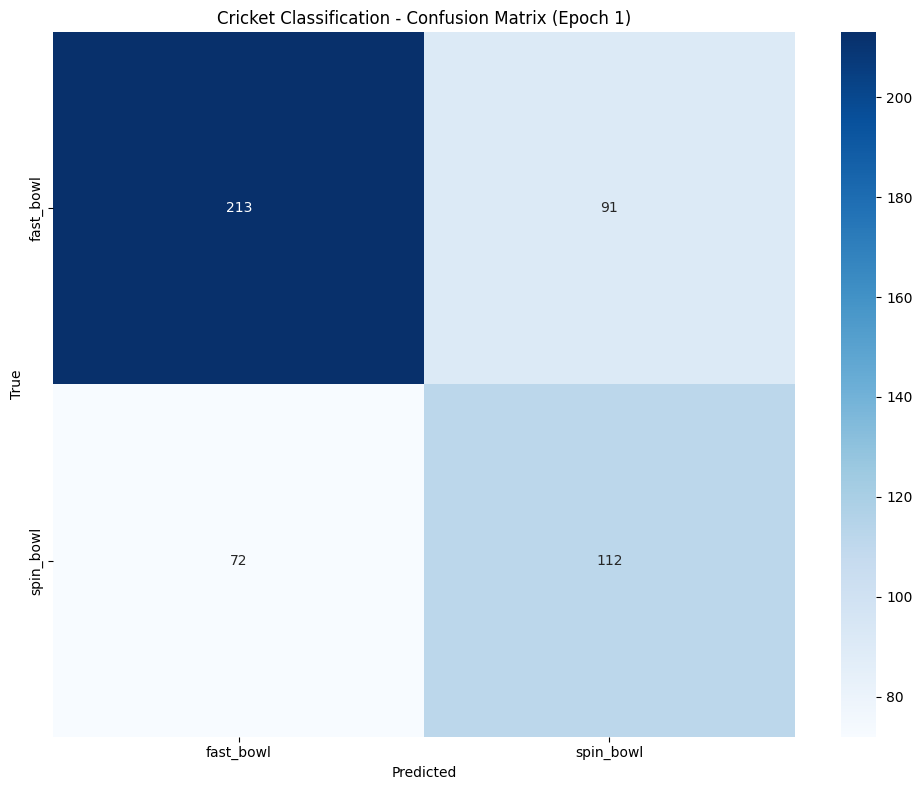

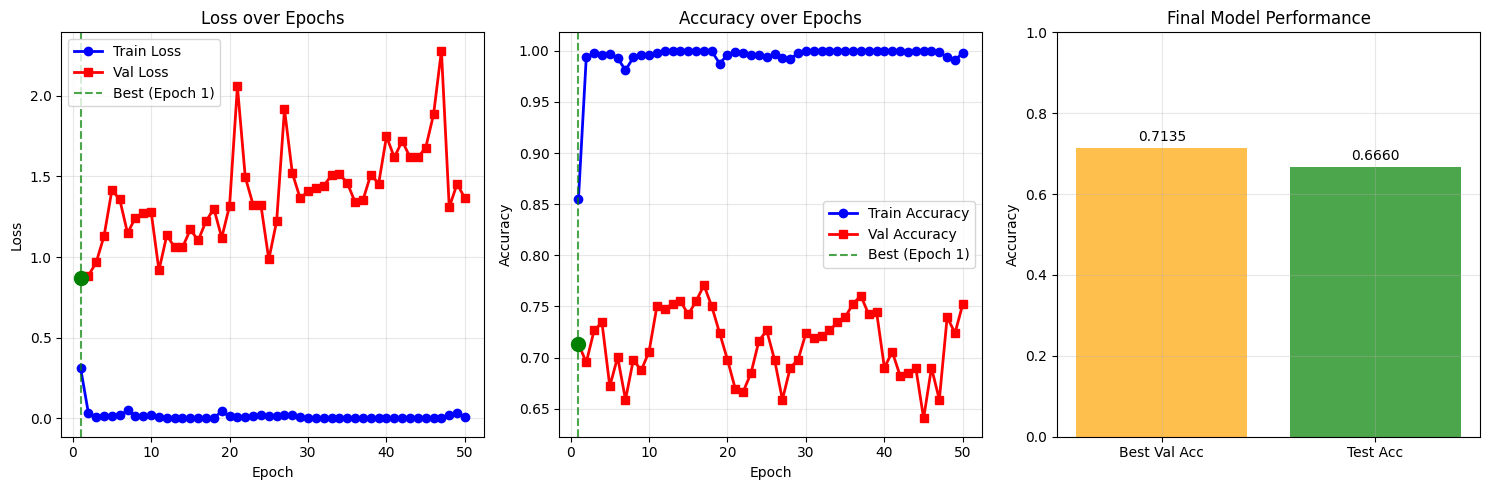


‚è∞ Final Timing Summary:
‚îÇ Total Training: 1499.41s (25.0 min)
‚îÇ Average per Epoch: 29.99s
‚îÇ Testing Time: 6.37s
‚îÇ Total Runtime: 1505.78s


In [9]:
import torch.optim as optim
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------
# 3. Training Setup
# -----------------------------
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)  # Lower LR for fine-tuning

print(f"\nüìã Training Configuration:")
print(f"‚îÇ Optimizer: Adam (lr={optimizer.param_groups[0]['lr']})")
print(f"‚îÇ Loss Function: CrossEntropyLoss")
print(f"‚îÇ Batch Size: 32")
print(f"‚îÇ Device: {device}")

# -----------------------------
# 4. Training Loop with Model Saving
# -----------------------------
train_losses, val_losses = [], []
train_accs, val_accs = [], []
epoch_times = []
epochs = 50

# Initialize best model tracking (using val_loss for fine-tuning)
best_val_loss = float('inf')
best_model_state = None
best_epoch = 0
best_val_acc = 0.0

print(f"\nüöÄ Starting Fine-tuning for {epochs} epochs...")
print("=" * 80)
total_start_time = time.time()

for epoch in range(epochs):
    epoch_start_time = time.time()
    
    print(f"\nüìà Epoch {epoch+1}/{epochs}")
    print("-" * 50)
    
    # Training Phase
    print("üîÑ Training Phase...")
    model.train()
    running_loss, correct, total = 0, 0, 0
    
    train_pbar = tqdm(train_loader, desc="Training", 
                     bar_format='{l_bar}{bar:30}{r_bar}{bar:-30b}')
    
    train_phase_start = time.time()
    
    for batch_idx, (imgs, labels) in enumerate(train_pbar):
        imgs, labels = imgs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(imgs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)
        
        current_acc = correct / total
        train_pbar.set_postfix({
            'Loss': f'{running_loss/(batch_idx+1):.4f}',
            'Acc': f'{current_acc:.4f}'
        })
        
        if device.type == 'cuda' and batch_idx % 10 == 0:
            gpu_memory = torch.cuda.memory_allocated() / 1024**3
            train_pbar.set_postfix({
                'Loss': f'{running_loss/(batch_idx+1):.4f}',
                'Acc': f'{current_acc:.4f}',
                'GPU': f'{gpu_memory:.1f}GB'
            })
    
    train_phase_time = time.time() - train_phase_start
    train_loss = running_loss / len(train_loader)
    train_acc = correct / total
    train_losses.append(train_loss)
    train_accs.append(train_acc)
    
    print(f"‚úÖ Training completed in {train_phase_time:.2f}s")
    
    # Validation Phase
    print("üîç Validation Phase...")
    model.eval()
    running_loss, correct, total = 0, 0, 0
    
    val_phase_start = time.time()
    val_pbar = tqdm(val_loader, desc="Validation", 
                   bar_format='{l_bar}{bar:30}{r_bar}{bar:-30b}')
    
    with torch.no_grad():
        for batch_idx, (imgs, labels) in enumerate(val_pbar):
            imgs, labels = imgs.to(device), labels.to(device)
            outputs = model(imgs)
            loss = criterion(outputs, labels)
            
            running_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
            
            current_acc = correct / total
            val_pbar.set_postfix({
                'Loss': f'{running_loss/(batch_idx+1):.4f}',
                'Acc': f'{current_acc:.4f}'
            })
    
    val_phase_time = time.time() - val_phase_start
    val_loss = running_loss / len(val_loader)
    val_acc = correct / total
    val_losses.append(val_loss)
    val_accs.append(val_acc)
    
    print(f"‚úÖ Validation completed in {val_phase_time:.2f}s")
    
    # Check if this is the best model (using val_loss for fine-tuning)
    is_best = val_loss < best_val_loss
    if is_best:
        best_val_loss = val_loss
        best_val_acc = val_acc
        best_epoch = epoch + 1
        best_model_state = model.state_dict().copy()
        print(f"üåü New best model found! Validation Loss: {val_loss:.4f}")
    
    # Epoch Summary
    epoch_time = time.time() - epoch_start_time
    epoch_times.append(epoch_time)
    
    print(f"\nüìä Epoch {epoch+1} Summary:")
    print(f"‚îÇ Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f}")
    print(f"‚îÇ Val Loss:   {val_loss:.4f} | Val Acc:   {val_acc:.4f}")
    print(f"‚îÇ Train Time: {train_phase_time:.2f}s | Val Time: {val_phase_time:.2f}s")
    print(f"‚îÇ Total Epoch Time: {epoch_time:.2f}s")
    print(f"‚îÇ Best Val Loss: {best_val_loss:.4f} (Epoch {best_epoch})")
    
    if device.type == 'cuda':
        print(f"‚îÇ GPU Memory: {torch.cuda.memory_allocated()/1024**3:.1f}GB / {torch.cuda.memory_reserved()/1024**3:.1f}GB")
    
    print("=" * 80)

total_training_time = time.time() - total_start_time

# Save the best model
if best_model_state is not None:
    torch.save(best_model_state, 'best_cricket_resnet50_pretrained.pth')
    print(f"\nüíæ Best model saved as 'best_cricket_resnet50.pth'")
    print(f"üìä Best model stats:")
    print(f"‚îÇ Best Epoch: {best_epoch}")
    print(f"‚îÇ Best Val Loss: {best_val_loss:.4f}")
    print(f"‚îÇ Best Val Acc: {best_val_acc:.4f}")

# Save training history
history_data = {
    'epoch': list(range(1, epochs+1)),
    'train_loss': train_losses,
    'val_loss': val_losses,
    'train_acc': train_accs,
    'val_acc': val_accs,
    'epoch_time': epoch_times
}

history_df = pd.DataFrame(history_data)
history_df.to_csv('cricket_training_history_resnet50_pretrained.csv', index=False)
print("\nüíæ Training history saved to 'cricket_training_history_resnet50_pretrained.csv'")

print(f"\nüéâ Fine-tuning Complete!")
print(f"Total Training Time: {total_training_time:.2f}s ({total_training_time/60:.1f} minutes)")
print(f"Average Epoch Time: {np.mean(epoch_times):.2f}s")

# -----------------------------
# 5. Load Best Model and Test
# -----------------------------
print(f"\nüß™ Loading Best Model for Testing...")
if best_model_state is not None:
    model.load_state_dict(best_model_state)
    print(f"‚úÖ Best model from epoch {best_epoch} loaded successfully!")

test_start_time = time.time()
y_true, y_pred = [], []
model.eval()
test_pbar = tqdm(test_loader, desc="Testing", 
                bar_format='{l_bar}{bar:30}{r_bar}{bar:-30b}')

with torch.no_grad():
    for imgs, labels in test_pbar:
        imgs, labels = imgs.to(device), labels.to(device)
        outputs = model(imgs)
        _, preds = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())

test_time = time.time() - test_start_time
test_accuracy = accuracy_score(y_true, y_pred)

print(f"‚úÖ Testing completed in {test_time:.2f}s")
print("\nüìã Classification Report:")
print(classification_report(y_true, y_pred, target_names=classes))
print(f"üéØ Test Accuracy: {test_accuracy:.4f}")

# Performance Summary
print(f"\nüìä Cricket Classification Performance:")
print(f"‚îÇ Best Validation Loss: {best_val_loss:.4f} (Epoch {best_epoch})")
print(f"‚îÇ Best Validation Acc:  {best_val_acc:.4f} (Epoch {best_epoch})")
print(f"‚îÇ Final Test Accuracy:  {test_accuracy:.4f}")
print(f"‚îÇ Val-Test Gap:         {abs(best_val_acc - test_accuracy):.4f}")

print(f"\nüíæ Files saved:")
print(f"‚îÇ best_cricket_resnet50.pth - Best model weights")
print(f"‚îÇ cricket_training_history.csv - Training metrics")

# -----------------------------
# 6. Visualizations
# -----------------------------
# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title(f"Cricket Classification - Confusion Matrix (Epoch {best_epoch})")
plt.tight_layout()
plt.show()

# Training Curves
plt.figure(figsize=(15, 5))

# Loss Plot
plt.subplot(1, 3, 1)
plt.plot(range(1, epochs+1), train_losses, 'b-', label="Train Loss", marker='o', linewidth=2)
plt.plot(range(1, epochs+1), val_losses, 'r-', label="Val Loss", marker='s', linewidth=2)
plt.axvline(x=best_epoch, color='green', linestyle='--', alpha=0.7, label=f'Best (Epoch {best_epoch})')
plt.scatter([best_epoch], [best_val_loss], color='green', s=100, zorder=5)
plt.legend()
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True, alpha=0.3)

# Accuracy Plot
plt.subplot(1, 3, 2)
plt.plot(range(1, epochs+1), train_accs, 'b-', label="Train Accuracy", marker='o', linewidth=2)
plt.plot(range(1, epochs+1), val_accs, 'r-', label="Val Accuracy", marker='s', linewidth=2)
plt.axvline(x=best_epoch, color='green', linestyle='--', alpha=0.7, label=f'Best (Epoch {best_epoch})')
plt.scatter([best_epoch], [best_val_acc], color='green', s=100, zorder=5)
plt.legend()
plt.title("Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True, alpha=0.3)

# Final Performance
plt.subplot(1, 3, 3)
metrics = ['Best Val Acc', 'Test Acc']
values = [best_val_acc, test_accuracy]
colors = ['orange', 'green']
bars = plt.bar(metrics, values, color=colors, alpha=0.7)
plt.title("Final Model Performance")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.grid(True, alpha=0.3)
for bar, val in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width()/2, val + 0.01, 
             f'{val:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Final Summary
print(f"\n‚è∞ Final Timing Summary:")
print(f"‚îÇ Total Training: {total_training_time:.2f}s ({total_training_time/60:.1f} min)")
print(f"‚îÇ Average per Epoch: {np.mean(epoch_times):.2f}s")
print(f"‚îÇ Testing Time: {test_time:.2f}s")
print(f"‚îÇ Total Runtime: {total_training_time + test_time:.2f}s")